In [3]:
# Decision For a Mobile Phone Based on criteria

# Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from pyDecision.algorithm import promethee_i, promethee_ii, promethee_gaia, electre_i
from pyDecision.algorithm import topsis_method
import scipy.stats as ss

## Now we import the dataset and take a look at it.

In [4]:
df = pd.read_csv("datasets/car_dataset.csv", encoding='latin-1')
df.drop(df[ (df['Marque'] == "Suzuki") | (df['Marque'] == "mini") 
           | (df['Marque'] == "Alfa Romeo") | (df['Marque'] == "Chevrolet")
          | (df['Marque'] == "Jeep") ].index, inplace=True)
colonnes_necessaires = [
    'Marque', 'Modèle', 'Année-Modèle', 'Kilométrage', 
    'Type de carburant', 'Prix', 'État','Première main'
]

df = df[colonnes_necessaires]
df = df.head(100)


df.head()

,Marque,Modèle,Année-Modèle,Kilométrage,Type de carburant,Prix,État,Première main
0,Fiat,Punto,2007,200 000 - 249 999,Diesel,60000,Très bon,Non
1,Dacia,Dokker Van,2013,400 000 - 449 999,Diesel,70000,Excellent,Non
2,Dacia,Dokker,2014,160 000 - 169 999,Diesel,90000,Très bon,NaN
3,Volkswagen,Touareg,2005,0 - 4 999,Diesel,90000,Excellent,Oui
4,Toyota,Prado,2007,200 000 - 249 999,Diesel,97000,Excellent,Non


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 101
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Marque             100 non-null    object
 1   Modèle             100 non-null    object
 2   Année-Modèle       100 non-null    int64 
 3   Kilométrage        100 non-null    object
 4   Type de carburant  100 non-null    object
 5   Prix               100 non-null    int64 
 6   État               83 non-null     object
 7   Première main      81 non-null     object
dtypes: int64(2), object(6)
memory usage: 7.0+ KB


## Handle missing data if exists

In [6]:
df.isnull().sum()

Marque                0
Modèle                0
Année-Modèle          0
Kilométrage           0
Type de carburant     0
Prix                  0
État                 17
Première main        19
dtype: int64

In [7]:
df.shape

(100, 8)

In [8]:
df.describe(include='all') 

,Marque,Modèle,Année-Modèle,Kilométrage,Type de carburant,Prix,État,Première main
count,100,100,100.000000,100,100,100.000000,83,81
unique,16,59,NaN,29,2,NaN,3,2
top,Renault,Kangoo,NaN,200 000 - 249 999,Diesel,NaN,Excellent,Non
freq,18,6,NaN,15,91,NaN,41,47
mean,NaN,NaN,2012.390000,NaN,NaN,129336.000000,NaN,NaN
std,NaN,NaN,5.020956,NaN,NaN,94140.732304,NaN,NaN
min,NaN,NaN,1998.000000,NaN,NaN,60000.000000,NaN,NaN
25%,NaN,NaN,2009.000000,NaN,NaN,83750.000000,NaN,NaN
50%,NaN,NaN,2013.500000,NaN,NaN,103000.000000,NaN,NaN
75%,NaN,NaN,2016.000000,NaN,NaN,141250.000000,NaN,NaN


# Clean up data

In [9]:
df['État'].value_counts()

État
Excellent    41
Très bon     33
Bon           9
Name: count, dtype: int64

In [10]:
df['Première main'].value_counts()

Première main
Non    47
Oui    34
Name: count, dtype: int64

In [11]:
df['État'].replace(to_replace='',value='Bon',inplace=True)
df['Première main'].replace(to_replace='',value='Non',inplace=True)
df.replace(to_replace=True,value=1,inplace=True)
df.replace(to_replace=False,value=0,inplace=True)

In [12]:
df = df.dropna()
df.isna().sum()


Marque               0
Modèle               0
Année-Modèle         0
Kilométrage          0
Type de carburant    0
Prix                 0
État                 0
Première main        0
dtype: int64

In [13]:
#voir le dataset
df.head()

,Marque,Modèle,Année-Modèle,Kilométrage,Type de carburant,Prix,État,Première main
0,Fiat,Punto,2007,200 000 - 249 999,Diesel,60000,Très bon,Non
1,Dacia,Dokker Van,2013,400 000 - 449 999,Diesel,70000,Excellent,Non
3,Volkswagen,Touareg,2005,0 - 4 999,Diesel,90000,Excellent,Oui
4,Toyota,Prado,2007,200 000 - 249 999,Diesel,97000,Excellent,Non
5,Volkswagen,Tiguan,2014,180 000 - 189 999,Diesel,255000,Très bon,Non


In [14]:

df.describe().round(2)

,Année-Modèle,Prix
count,76.00,76.00
mean,2012.46,127652.63
std,5.02,98468.44
min,1998.00,60000.00
25%,2009.00,83750.00
50%,2013.50,103000.00
75%,2016.25,140000.00
max,2021.00,780000.00


In [15]:
splited = df['Kilométrage'].str.split("-", n = 1, expand = True)
splited[0] = splited[0].str.replace(' ','').astype(int)
splited[1] = splited[1].str.replace(' ','').astype(int)
df['Kilométrage'] = (splited[1] + splited[0])/2


In [16]:
df.describe().round(2)

,Année-Modèle,Kilométrage,Prix
count,76.00,76.00,76.00
mean,2012.46,140624.50,127652.63
std,5.02,92207.31,98468.44
min,1998.00,2499.50,60000.00
25%,2009.00,71249.50,83750.00
50%,2013.50,134999.50,103000.00
75%,2016.25,224999.50,140000.00
max,2021.00,424999.50,780000.00


In [17]:
df["Marque"].unique()

array(['Fiat', 'Dacia', 'Volkswagen', 'Toyota', 'Peugeot', 'Ford',
       'Land Rover', 'Citroen', 'Mercedes-Benz', 'Opel', 'Hyundai',
       'Renault', 'Audi', 'Nissan', 'Skoda'], dtype=object)

In [18]:
# Create a dictionary that maps the unique string values in the 'Marque' column to unique integers
marque_to_int = {marque: i for i, marque in enumerate(df['Marque'].unique())}

# Create a dictionary that maps the unique integers back to the original string values
int_to_marque = {i: marque for marque, i in marque_to_int.items()}

# Replace the string values in the 'Marque' column with their corresponding integer values
df['Marque_encoded'] = df['Marque'].map(marque_to_int)

# Print the dictionaries
print("Marque to Int:", marque_to_int)
print("Int to Marque:", int_to_marque)

Marque to Int: {'Fiat': 0, 'Dacia': 1, 'Volkswagen': 2, 'Toyota': 3, 'Peugeot': 4, 'Ford': 5, 'Land Rover': 6, 'Citroen': 7, 'Mercedes-Benz': 8, 'Opel': 9, 'Hyundai': 10, 'Renault': 11, 'Audi': 12, 'Nissan': 13, 'Skoda': 14}
Int to Marque: {0: 'Fiat', 1: 'Dacia', 2: 'Volkswagen', 3: 'Toyota', 4: 'Peugeot', 5: 'Ford', 6: 'Land Rover', 7: 'Citroen', 8: 'Mercedes-Benz', 9: 'Opel', 10: 'Hyundai', 11: 'Renault', 12: 'Audi', 13: 'Nissan', 14: 'Skoda'}


In [19]:
df.head()

,Marque,Modèle,Année-Modèle,Kilométrage,Type de carburant,Prix,État,Première main,Marque_encoded
0,Fiat,Punto,2007,224999.5,Diesel,60000,Très bon,Non,0
1,Dacia,Dokker Van,2013,424999.5,Diesel,70000,Excellent,Non,1
3,Volkswagen,Touareg,2005,2499.5,Diesel,90000,Excellent,Oui,2
4,Toyota,Prado,2007,224999.5,Diesel,97000,Excellent,Non,3
5,Volkswagen,Tiguan,2014,184999.5,Diesel,255000,Très bon,Non,2


In [20]:
df["Marque"].value_counts()

Marque
Renault          14
Volkswagen       10
Dacia             9
Peugeot           9
Mercedes-Benz     6
Hyundai           5
Ford              4
Citroen           4
Audi              3
Nissan            3
Fiat              2
Toyota            2
Land Rover        2
Opel              2
Skoda             1
Name: count, dtype: int64

In [21]:
df.head()

,Marque,Modèle,Année-Modèle,Kilométrage,Type de carburant,Prix,État,Première main,Marque_encoded
0,Fiat,Punto,2007,224999.5,Diesel,60000,Très bon,Non,0
1,Dacia,Dokker Van,2013,424999.5,Diesel,70000,Excellent,Non,1
3,Volkswagen,Touareg,2005,2499.5,Diesel,90000,Excellent,Oui,2
4,Toyota,Prado,2007,224999.5,Diesel,97000,Excellent,Non,3
5,Volkswagen,Tiguan,2014,184999.5,Diesel,255000,Très bon,Non,2


In [22]:
df['Modèle'].value_counts()

Modèle
Kangoo                5
Clio                  5
Logan                 4
Classe C              3
Qashqai               3
Focus                 2
Megane 3              2
Duster                2
ix 35                 2
C3                    2
A3                    2
220                   2
Astra                 2
GOLF 7                2
208                   2
Touareg               2
Berlingo              2
308                   2
Range Rover Evoque    1
Q5                    1
VERSO                 1
Megane 4              1
206+                  1
Tepee                 1
Master                1
Octavia               1
Elantra               1
Sandero               1
GOLF 5                1
500                   1
Polo                  1
Punto                 1
2008                  1
GOLF 4                1
PASSAT CC             1
Classe CLK            1
Partner               1
Dokker Van            1
GOLF 6                1
H-1                   1
Fiesta                1
301      

In [23]:
df["Modèle"].unique()

array(['Punto', 'Dokker Van', 'Touareg', 'Prado', 'Tiguan', '308', '208',
       'GOLF 7', 'Kuga', 'Range Rover Sport', 'Berlingo', 'Logan Mcv',
       'Focus', '301', '220', 'Astra', 'Fiesta', 'H-1', 'Clio', 'GOLF 6',
       'A3', 'Kangoo', 'C3', 'Qashqai', 'Classe C', 'Partner', 'ix 35',
       'Classe CLK', 'PASSAT CC', 'GOLF 4', '2008', '500', 'Polo',
       'Megane 3', 'Duster', 'Logan', 'VERSO', 'Megane 4', 'Elantra',
       'Sandero', 'GOLF 5', '206+', 'Tepee', 'Octavia', 'Master', 'Q5',
       'Range Rover Evoque', 'i 10'], dtype=object)

In [24]:

model_to_int = {model: i for i, model in enumerate(df['Modèle'].unique())}

int_to_model = {i: model for model, i in model_to_int.items()}


df['Modèle_encoded'] = df['Modèle'].map(model_to_int)

# Print the dictionaries
print("Modèle to Int:", model_to_int)
print("Int to Modèle:", int_to_model)

Modèle to Int: {'Punto': 0, 'Dokker Van': 1, 'Touareg': 2, 'Prado': 3, 'Tiguan': 4, '308': 5, '208': 6, 'GOLF 7': 7, 'Kuga': 8, 'Range Rover Sport': 9, 'Berlingo': 10, 'Logan Mcv': 11, 'Focus': 12, '301': 13, '220': 14, 'Astra': 15, 'Fiesta': 16, 'H-1': 17, 'Clio': 18, 'GOLF 6': 19, 'A3': 20, 'Kangoo': 21, 'C3': 22, 'Qashqai': 23, 'Classe C': 24, 'Partner': 25, 'ix 35': 26, 'Classe CLK': 27, 'PASSAT CC': 28, 'GOLF 4': 29, '2008': 30, '500': 31, 'Polo': 32, 'Megane 3': 33, 'Duster': 34, 'Logan': 35, 'VERSO': 36, 'Megane 4': 37, 'Elantra': 38, 'Sandero': 39, 'GOLF 5': 40, '206+': 41, 'Tepee': 42, 'Octavia': 43, 'Master': 44, 'Q5': 45, 'Range Rover Evoque': 46, 'i 10': 47}
Int to Modèle: {0: 'Punto', 1: 'Dokker Van', 2: 'Touareg', 3: 'Prado', 4: 'Tiguan', 5: '308', 6: '208', 7: 'GOLF 7', 8: 'Kuga', 9: 'Range Rover Sport', 10: 'Berlingo', 11: 'Logan Mcv', 12: 'Focus', 13: '301', 14: '220', 15: 'Astra', 16: 'Fiesta', 17: 'H-1', 18: 'Clio', 19: 'GOLF 6', 20: 'A3', 21: 'Kangoo', 22: 'C3', 23:

In [25]:

pm_to_int = {pm: i for i, pm in enumerate(df['Première main'].unique())}


int_to_pm = {i: pm for pm, i in pm_to_int.items()}

df['pm_encoded'] = df['Première main'].map(pm_to_int)

# Print the dictionaries
print("Pm to Int:", pm_to_int)
print("Int to pm:", int_to_pm)

Pm to Int: {'Non': 0, 'Oui': 1}
Int to pm: {0: 'Non', 1: 'Oui'}


In [26]:
df.head()

,Marque,Modèle,Année-Modèle,Kilométrage,Type de carburant,Prix,État,Première main,Marque_encoded,Modèle_encoded,pm_encoded
0,Fiat,Punto,2007,224999.5,Diesel,60000,Très bon,Non,0,0,0
1,Dacia,Dokker Van,2013,424999.5,Diesel,70000,Excellent,Non,1,1,0
3,Volkswagen,Touareg,2005,2499.5,Diesel,90000,Excellent,Oui,2,2,1
4,Toyota,Prado,2007,224999.5,Diesel,97000,Excellent,Non,3,3,0
5,Volkswagen,Tiguan,2014,184999.5,Diesel,255000,Très bon,Non,2,4,0


In [27]:

etat_to_int = {e: i for i, e in enumerate(df['État'].unique())}


int_to_etat = {e: e for e, i in etat_to_int.items()}


df['État_encoded'] = df['État'].map(etat_to_int)

# Print the dictionaries
print("État to Int:", etat_to_int)
print("int to etat :", int_to_etat)

État to Int: {'Très bon': 0, 'Excellent': 1, 'Bon': 2}
int to etat : {'Très bon': 'Très bon', 'Excellent': 'Excellent', 'Bon': 'Bon'}


In [28]:

tc_to_int = {tc: i for i, tc in enumerate(df['Type de carburant'].unique())}


int_to_tc = {i: tc for tc, i in tc_to_int.items()}


df['tc_encoded'] = df['Type de carburant'].map(tc_to_int)

# Print the dictionaries
print("tc to Int:", tc_to_int)
print("int to tc:", int_to_tc)

tc to Int: {'Diesel': 0, 'Essence': 1}
int to tc: {0: 'Diesel', 1: 'Essence'}


In [29]:
df.isna().sum()

Marque               0
Modèle               0
Année-Modèle         0
Kilométrage          0
Type de carburant    0
Prix                 0
État                 0
Première main        0
Marque_encoded       0
Modèle_encoded       0
pm_encoded           0
État_encoded         0
tc_encoded           0
dtype: int64

## Now we set the criterias and their weights for the decision

In [30]:
criteria = ['Marque_encoded', 'Modèle_encoded', 'Année-Modèle', 'Kilométrage', 'tc_encoded', 'Prix', 'État_encoded','pm_encoded']
weights = [0.3, 0.1, 0.2, 0.1, 0.2, 0.1, 0.1,0.2]
Q = [0.1] * len(criteria)  # Example values, adjust as needed
S = [0.2] * len(criteria)  # Example values, adjust as needed
P = [0.3] * len(criteria)  # Example values, adjust as needed
F = [0] * len(criteria)  # Example values, adjust as needed
criterion_type = ['max', 'max', 'max', 'max', 'max', 'min', 'max', 'max']  # Example values, adjust as needed


## Normalize the data

In [31]:
scaler = MinMaxScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(df[criteria]), columns=criteria)
print(normalized_df.head())

   Marque_encoded  Modèle_encoded  Année-Modèle  Kilométrage  tc_encoded  \
0        0.000000        0.000000      0.391304     0.526627         0.0   
1        0.071429        0.021277      0.652174     1.000000         0.0   
2        0.142857        0.042553      0.304348     0.000000         0.0   
3        0.214286        0.063830      0.391304     0.526627         0.0   
4        0.142857        0.085106      0.695652     0.431953         0.0   

       Prix  État_encoded  pm_encoded  
0  0.000000           0.0         0.0  
1  0.013889           0.5         0.0  
2  0.041667           0.5         1.0  
3  0.051389           0.5         0.0  
4  0.270833           0.0         0.0  


In [32]:
df.head()

,Marque,Modèle,Année-Modèle,Kilométrage,Type de carburant,Prix,État,Première main,Marque_encoded,Modèle_encoded,pm_encoded,État_encoded,tc_encoded
0,Fiat,Punto,2007,224999.5,Diesel,60000,Très bon,Non,0,0,0,0,0
1,Dacia,Dokker Van,2013,424999.5,Diesel,70000,Excellent,Non,1,1,0,1,0
3,Volkswagen,Touareg,2005,2499.5,Diesel,90000,Excellent,Oui,2,2,1,1,0
4,Toyota,Prado,2007,224999.5,Diesel,97000,Excellent,Non,3,3,0,1,0
5,Volkswagen,Tiguan,2014,184999.5,Diesel,255000,Très bon,Non,2,4,0,0,0


## Calculate the score and ranking for each algorithm



In [33]:
# Apply PROMETHEE I
promethee_i_results = promethee_i(normalized_df.values, weights, Q, S, P, F)
print(promethee_i_results)

[['-' '-' '-' ... '-' '-' '-']
 ['P+' '-' '-' ... '-' '-' '-']
 ['P+' 'P+' '-' ... '-' '-' 'P+']
 ...
 ['P+' 'P+' 'P+' ... '-' '-' 'P+']
 ['P+' 'P+' 'P+' ... 'P+' '-' 'P+']
 ['P+' 'P+' '-' ... '-' '-' '-']]


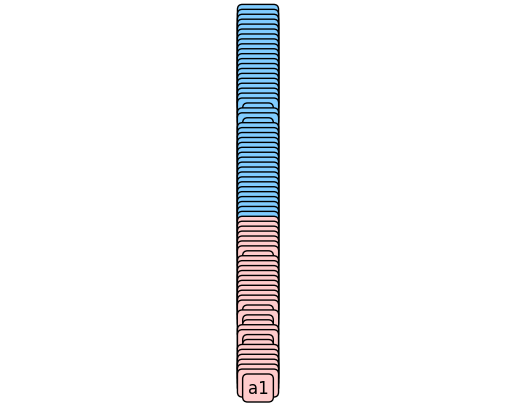

[66, 75, 68, 54, 46, 65, 72, 71, 64, 43, 23, 42, 34, 51, 58, 31, 27, 29, 26, 35, 9, 20, 17, 7, 53, 60, 21, 24, 69, 62, 47, 74, 48, 52, 11, 18, 55, 41, 19, 32, 30, 25, 16, 10, 36, 63, 44, 39, 12, 61, 3, 50, 28, 37, 40, 76, 15, 73, 13, 67, 14, 2, 33, 6, 8, 59, 56, 5, 4, 22, 49, 57, 45, 38, 70, 1]


In [34]:
# Apply PROMETHEE II
results = promethee_ii(normalized_df.values, weights, Q, S, P, F, sort = True, graph = True, verbose = True)
# Get only the first cell of each sub array in results
promethee_ii_results = [int(sub_array[0]) for sub_array in results]
print(promethee_ii_results)

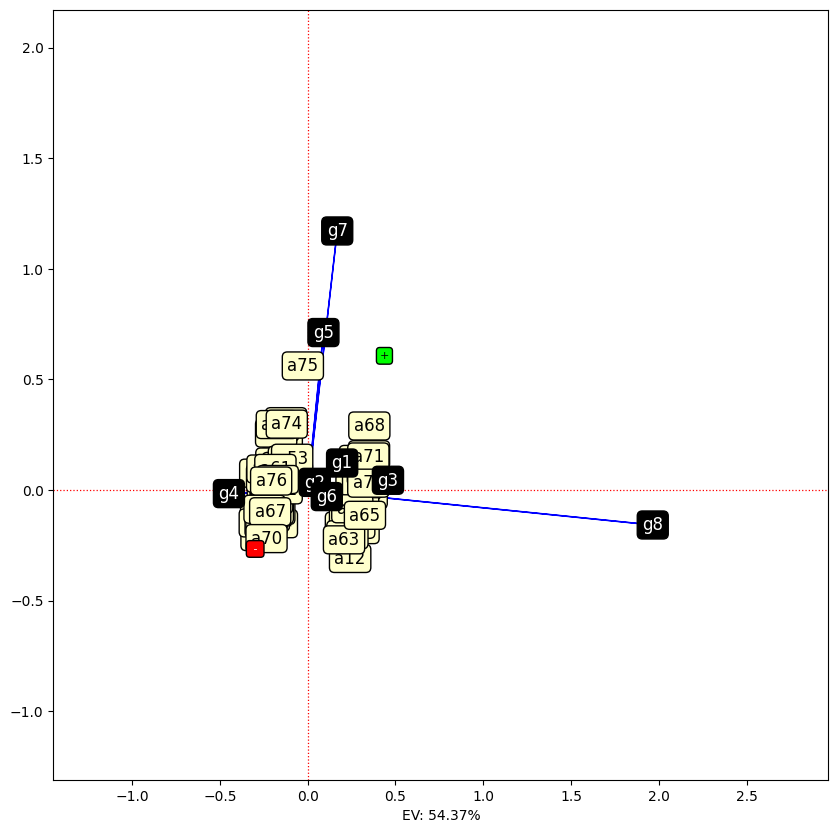

None


In [35]:
# Apply PROMETHEE Gaia
promethee_gaia_results = promethee_gaia(normalized_df.values, weights, Q, S, P, F)
print(promethee_gaia_results)

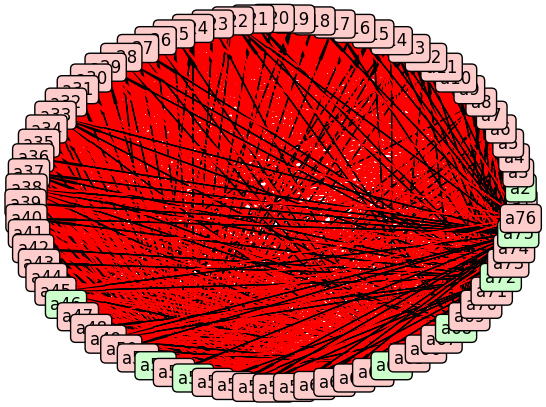

(array([[1.        , 0.30769231, 0.38461538, ..., 0.38461538, 0.23076923,
        0.38461538],
       [1.        , 1.        , 0.46153846, ..., 0.53846154, 0.30769231,
        0.61538462],
       [0.76923077, 0.76923077, 1.        , ..., 0.38461538, 0.23076923,
        0.38461538],
       ...,
       [0.92307692, 0.76923077, 0.76923077, ..., 1.        , 0.61538462,
        0.69230769],
       [0.92307692, 0.84615385, 0.76923077, ..., 0.61538462, 1.        ,
        0.84615385],
       [1.        , 0.76923077, 0.84615385, ..., 0.61538462, 0.30769231,
        1.        ]]), array([[0.        , 0.5       , 1.        , ..., 1.        , 1.        ,
        0.5       ],
       [0.        , 0.        , 1.        , ..., 0.71428571, 1.        ,
        0.28571429],
       [0.52662722, 1.        , 0.        , ..., 0.65957447, 1.        ,
        0.52662722],
       ...,
       [0.21301775, 0.68639053, 1.        , ..., 0.        , 1.        ,
        0.21301775],
       [0.26035503, 0.73372781, 1

In [36]:

# Apply ELECTRE I
electre_i_results = electre_i(normalized_df.values, weights)
print(electre_i_results)

a1: 0.39
a2: 0.43
a3: 0.43
a4: 0.41
a5: 0.35
a6: 0.42
a7: 0.46
a8: 0.37
a9: 0.47
a10: 0.26
a11: 0.63
a12: 0.44
a13: 0.42
a14: 0.42
a15: 0.45
a16: 0.49
a17: 0.48
a18: 0.5
a19: 0.49
a20: 0.49
a21: 0.46
a22: 0.4
a23: 0.51
a24: 0.49
a25: 0.5
a26: 0.52
a27: 0.53
a28: 0.47
a29: 0.5
a30: 0.5
a31: 0.47
a32: 0.5
a33: 0.43
a34: 0.52
a35: 0.48
a36: 0.48
a37: 0.4
a38: 0.4
a39: 0.46
a40: 0.42
a41: 0.49
a42: 0.53
a43: 0.54
a44: 0.49
a45: 0.39
a46: 0.64
a47: 0.49
a48: 0.44
a49: 0.41
a50: 0.43
a51: 0.52
a52: 0.49
a53: 0.48
a54: 0.54
a55: 0.44
a56: 0.41
a57: 0.43
a58: 0.53
a59: 0.4
a60: 0.62
a61: 0.43
a62: 0.48
a63: 0.45
a64: 0.55
a65: 0.52
a66: 0.5
a67: 0.4
a68: 0.68
a69: 0.66
a70: 0.39
a71: 0.63
a72: 0.42
a73: 0.42
a74: 0.5
a75: 0.72
a76: 0.43


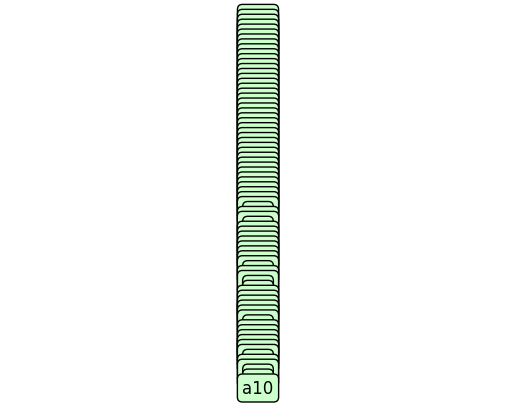

[71 56 53 64 75 57 44 74 41 76  6 49 58 61 46 33 36 23 30 26 43 69 18 29
 24 14 13 40 21 19 39 20 54 15 34 38 68 70 42 60 27 12 10 32 72  4 28 48
 65 50 16 31 37  9 47 63 55 11 66  7 52 35 45  8 17 25 67  2  3 73  5 59
 62 22  1 51]


In [37]:

# Apply TOPSIS
results = topsis_method(normalized_df.values, weights, criterion_type)
topsis_results = ss.rankdata(-results, method='ordinal')
print(topsis_results)

In [38]:
# Combine results with the original data
# df['PROMETHEE I Rank'] = promethee_i_results
df['PROMETHEE II Rank'] = promethee_ii_results
# df['PROMETHEE Gaia Rank'] = promethee_gaia_results['Phi']  # Assuming 'Phi' is the main Rank
# df['ELECTRE I Rank'] = electre_i_results
df['TOPSIS Rank'] = topsis_results

In [39]:
df.head()

,Marque,Modèle,Année-Modèle,Kilométrage,Type de carburant,Prix,État,Première main,Marque_encoded,Modèle_encoded,pm_encoded,État_encoded,tc_encoded,PROMETHEE II Rank,TOPSIS Rank
0,Fiat,Punto,2007,224999.5,Diesel,60000,Très bon,Non,0,0,0,0,0,66,71
1,Dacia,Dokker Van,2013,424999.5,Diesel,70000,Excellent,Non,1,1,0,1,0,75,56
3,Volkswagen,Touareg,2005,2499.5,Diesel,90000,Excellent,Oui,2,2,1,1,0,68,53
4,Toyota,Prado,2007,224999.5,Diesel,97000,Excellent,Non,3,3,0,1,0,54,64
5,Volkswagen,Tiguan,2014,184999.5,Diesel,255000,Très bon,Non,2,4,0,0,0,46,75


In [42]:
# Show the brand and model with the better rank promethee II
df.sort_values(by=['PROMETHEE II Rank'])[['PROMETHEE II Rank','Marque', 'Modèle','Première main' ]].head(10)

,PROMETHEE II Rank,Marque,Modèle,Première main
101,1,Ford,Focus,Non
83,2,Mercedes-Benz,Classe C,Oui
71,3,Citroen,C3,Oui
91,4,Opel,Astra,Non
90,5,Peugeot,208,Oui
86,6,Skoda,Octavia,Oui
33,7,Renault,Kangoo,Non
87,8,Renault,Master,Oui
30,9,Peugeot,308,Oui
63,10,Renault,Kangoo,Non


In [43]:
# Show the brand and model with the better rank topsis
df.sort_values(by=['TOPSIS Rank'])[[ 'TOPSIS Rank','Marque', 'Modèle','Première main']].head(10)

,TOPSIS Rank,Marque,Modèle,Première main
100,1,Hyundai,i 10,Non
90,2,Peugeot,208,Oui
91,3,Opel,Astra,Non
65,4,Volkswagen,Polo,Oui
94,5,Dacia,Logan,Oui
14,6,Citroen,Berlingo,Non
81,7,Peugeot,206+,Non
86,8,Skoda,Octavia,Oui
74,9,Nissan,Qashqai,Oui
61,10,Renault,Clio,Oui
